In [1]:
# importing requrd libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<hr>
<h3><ol> 1. Import a 311 NYC service request</ol></h3>
<hr>

In [2]:
data_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [3]:
# Top five records of the data set.
data_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Last five records of the data set.
data_df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [5]:
# shape of the data set.
data_df.shape

(300698, 53)

In [6]:
# Information of the data set.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
# Some basic statical details.
data_df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [8]:
# Column names of data set.
data_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
#Percentage Of Missing Values In Data Set
pd.DataFrame((data_df.isnull().sum()/data_df.shape[0]*100)).sort_values(0,ascending=False)

,0
School or Citywide Complaint,100.000000
Vehicle Type,100.000000
Taxi Company Borough,100.000000
Taxi Pick Up Location,100.000000
Garage Lot Name,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Name,99.919188


<hr>
<p style="color:DodgerBlue;">As we can see the columns 'School or Citywide Complaint, Vehicle Type, Taxi Company Borough, Taxi Pick Up Location, Garage Lot Name, etc' have high percentage of the missing values. </p>
<hr>

In [10]:
#Remove the column with very high percentage of missing value
df=data_df.loc[:,(data_df.isnull().sum()/data_df.shape[0]*100)<=80]

In [11]:
#Percentage Of Missing Values In Data Set
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)

,0
Cross Street 2,16.554483
Cross Street 1,16.388203
Incident Address,14.768971
Street Name,14.768971
Descriptor,1.966757
Location,1.177261
Longitude,1.177261
Latitude,1.177261
Y Coordinate (State Plane),1.177261
X Coordinate (State Plane),1.177261


In [12]:
print("Old DataFrame Shape :",data_df.shape)
print("New DataFrame Shape : ",df.shape)

Old DataFrame Shape : (300698, 53)
New DataFrame Shape :  (300698, 39)


<hr>
<h3>
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and
create a new column ‘Request_Closing_Time’ as the time elapsed between request
creation and request closing. (Hint: Explore the package/module datetime)
</h3>
<hr>

In [13]:
# 'Created Date' and 'Closed Date' columns. 
df[['Created Date', 'Closed Date']]

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24
...,...,...
300693,03/29/2015 12:33:41 AM,NaN
300694,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM
300695,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM
300696,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM


In [14]:
# Converting to datetime.
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [15]:
# Converting to Hrs and Creating new column 'Request_Closing_Time'.
df["Request_Closing_Time"]=(df["Closed Date"]-df["Created Date"])

Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time

In [16]:
# Top five records of the data set.
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


In [17]:
# new_zz = pd.DataFrame(df[df['Complaint Type'] == 'Blocked Driveway'])
# new_zz['Complaint Type'].value_counts()

In [18]:
# Top five records of the "Request_Closing_Time"
df['Request_Closing_Time'].head()

0     55.250000
1     86.266667
2    291.516667
3    465.233333
4    207.033333
Name: Request_Closing_Time, dtype: float64

<hr>
<h3>
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at
least 4 major conclusions that you can come up with after generic data mining.
</h3>
<hr>

<AxesSubplot:title={'center':'Top 10 Complaint Type'}>

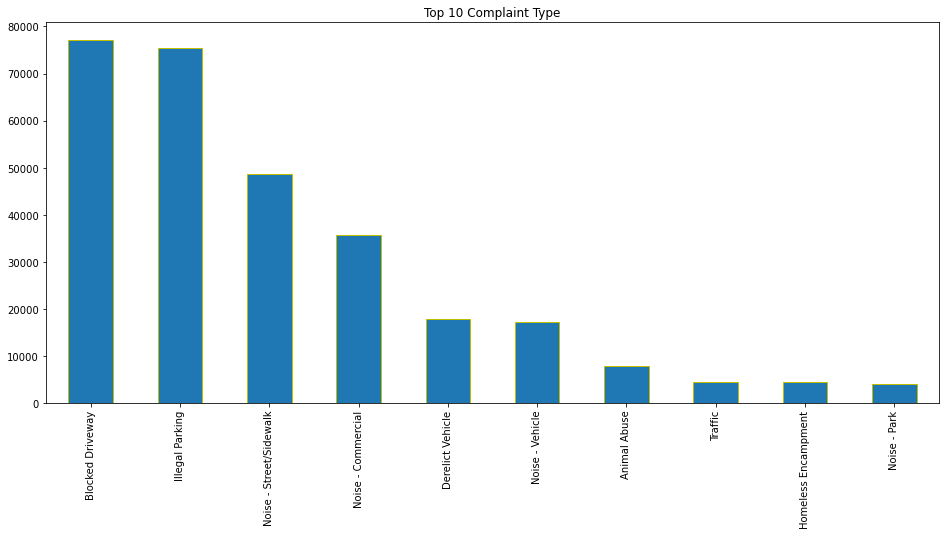

In [19]:
# Top 10 Complaint Type
df['Complaint Type'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Complaint Type', edgecolor='y', figsize=(16,7))

<hr>
<p style="color:DodgerBlue;">From above we can see <b>'Blocked Driveway (77044)'</b> and <b>'Illegal Parking (75361)'</b> have most complaints. </p>
<hr>

<AxesSubplot:title={'center':'Top 10 Location'}>

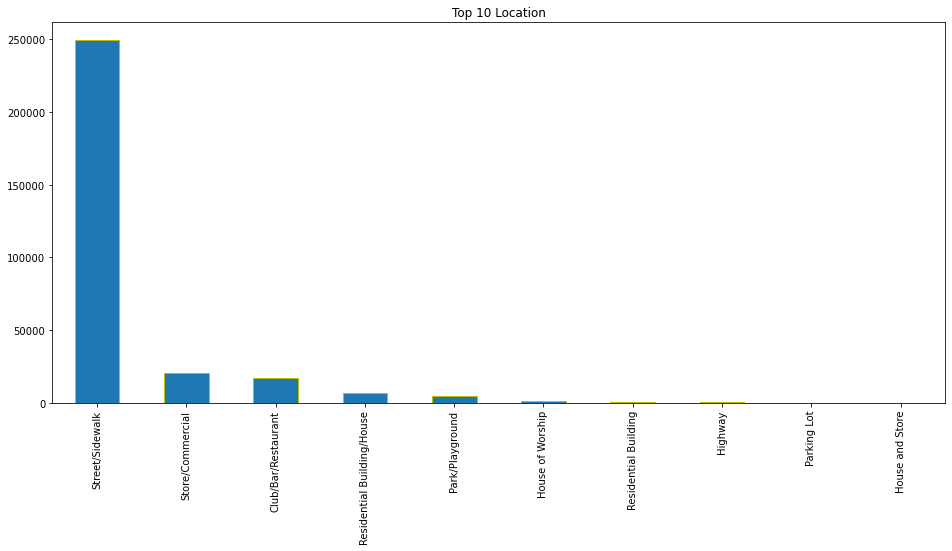

In [20]:
# Top 10 Location
df['Location Type'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Location', edgecolor='y', figsize=(16,7))

<hr>
<p style="color:DodgerBlue;">From above we can see on location <b>'Street/Sidewalk (249299)'</b>  have most complaints. </p>
<hr>

In [21]:
df['Agency'].unique()

array(['NYPD'], dtype=object)

In [22]:
df['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

<AxesSubplot:title={'center':'Agency'}>

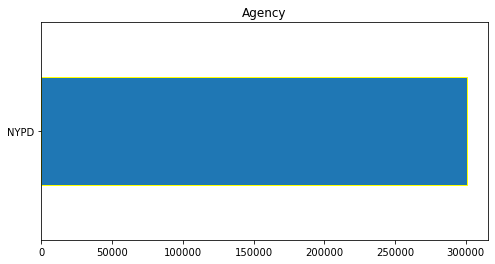

In [23]:
df['Agency'].value_counts().head(10).plot(kind = 'barh', title = 'Agency', edgecolor='Yellow', figsize=(8,4))

<hr>
<p style="color:DodgerBlue;">All the data belongs to only one agency <b>'NYPD (300698)'</b>. </p>
<hr>

In [24]:
df['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

<AxesSubplot:title={'center':'Descriptor'}>

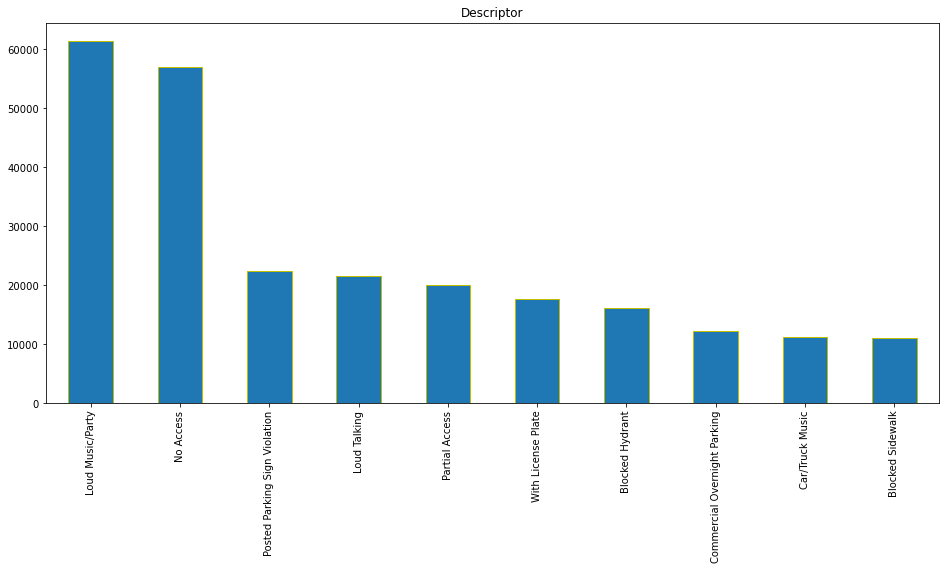

In [25]:
df['Descriptor'].value_counts().head(10).plot(kind = 'bar', title = 'Descriptor', edgecolor='y', figsize=(16,7))

<hr>
<p style="color:DodgerBlue;">From above we can see <b>'Loud Music/Party (61430)'</b> have most complaints. </p>
<hr>

<AxesSubplot:>

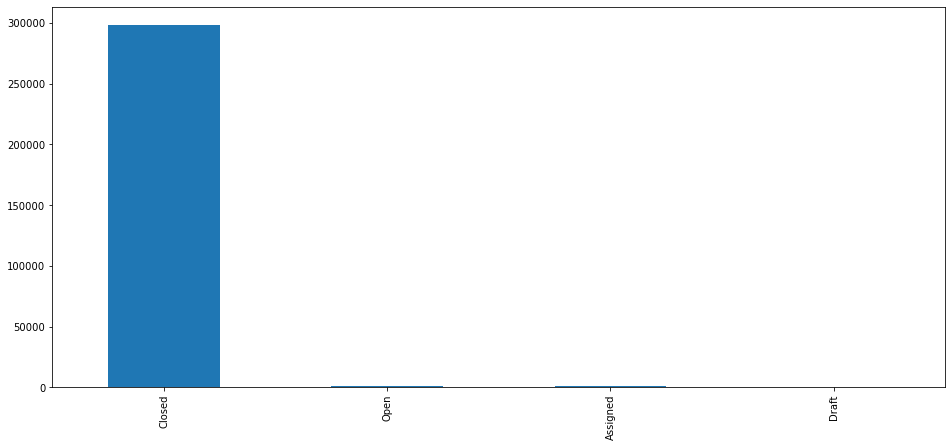

In [26]:
df['Status'].value_counts().plot(kind='bar', figsize=(16,7))

<hr>
<p style="color:DodgerBlue;">As we can see <b><em>298471</em> complaints are closed </b>. </p>
<hr>

<hr>
<h3>
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them
for different locations
</h3>
<hr>

In [27]:
# Group by Complaint Type.
new_Complaint_Type_df = pd.DataFrame(df.groupby("Complaint Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")
new_Complaint_Type_df.reset_index(inplace=True)
new_Complaint_Type_df

,Complaint Type,Request_Closing_Time
0,Posting Advertisement,118.548200
1,Illegal Fireworks,165.668353
2,Noise - Commercial,188.829266
3,Noise - House of Worship,191.597901
4,Noise - Park,204.643950
5,Noise - Street/Sidewalk,206.713445
6,Traffic,206.920867
7,Disorderly Youth,213.515035
8,Noise - Vehicle,215.339604
9,Urinating in Public,217.599859


In [28]:
# Group by Location Type.
new_Location_Type_df = pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")
new_Location_Type_df.reset_index(inplace=True)
new_Location_Type_df

,Location Type,Request_Closing_Time
0,Subway Station,142.250980
1,Club/Bar/Restaurant,186.074330
2,House of Worship,191.833279
3,Store/Commercial,198.089073
4,Park/Playground,207.137129
5,Highway,223.424221
6,Bridge,229.158333
7,Roadway Tunnel,266.525714
8,Street/Sidewalk,268.515306
9,Residential Building,289.089941


<hr>
<p style="color:DodgerBlue;">From above we can see <b>'Park, Vacant Lot, Commercial Areas, Parking Lot'</b> taken more time to resolve the complaint. </p>
<hr>

<hr>
<h3>5. Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide
a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
<ul>
<li>Whether the average response time across complaint types is similar or not (overall)</li>
<li>Are the type of complaint or service requested and location related?</li>
</ul>
</h3>
<hr>

In [29]:
# Checking for null values.
df['Request_Closing_Time'].isnull().sum()

2164

In [30]:
# Filling null values.
df['Request_Closing_Time'].fillna(df['Request_Closing_Time'].mean(), inplace=True )

In [31]:
df['Request_Closing_Time'].isnull().sum()

0

<hr>
<p style="color:DodgerBlue;">H0: there is no significant different in mean of Request_Closing_Time for different Complaint<br>
H1:there is signficant different in mean of Request_Closing_Time for different Complaint
</p>
<hr>

In [32]:
# Creating new Data Frame "new_df"
new_df=pd.DataFrame()
new_df["Request_Closing_Time"]=df["Request_Closing_Time"]
new_df["Complaint"]=df["Complaint Type"]

In [33]:
# Top five records.
new_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [34]:
lm=ols("Request_Closing_Time ~ Complaint",data=new_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,23.0,1.447183e+09,6.292098e+07,492.60606,0.0
Residual,300674.0,3.840534e+10,1.277308e+05,NaN,NaN


<hr>
<p style="color:DodgerBlue;">
    The <b><em>p value</em></b> for the Complaint is <b><em>less than 0.01</em></b>.  We <b>accept alternate hypothesis</b> that is there is significant difference in the mean response time with respect to different type of complaint.
</p>
<hr>

<hr>
<p style="color:DodgerBlue;">
H0:Complaint Type and Location Type are independent<br>
H1:Complaint Type and Location Type are related
</p>
<hr>

In [35]:
# Creating new data frame
new_df_chi_sq=pd.DataFrame()
new_df_chi_sq["Location Type"]=df["Location Type"]
new_df_chi_sq["Complaint Type"]=df["Complaint Type"]

new_df_chi_sq.dropna(inplace=True)


In [36]:
data_crosstab = pd.crosstab( new_df_chi_sq["Location Type"],new_df_chi_sq["Complaint Type"])
data_crosstab

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,
Bridge,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Club/Bar/Restaurant,0,0,0,0,0,0,366,0,0,0,...,0,0,0,0,0,0,0,0,21,0
Commercial,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ferry,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Highway,0,0,0,0,14,0,0,0,0,15,...,0,0,0,0,0,0,0,186,0,0
House and Store,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
House of Worship,0,0,0,0,0,0,0,0,0,0,...,929,0,0,0,0,0,0,0,0,0
Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Park/Playground,123,0,0,0,0,0,98,0,0,353,...,0,4041,0,0,6,0,0,0,38,106


In [37]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


<hr>
<p style="color:DodgerBlue;">
    Since p value for the chi square test is less than 0.05 we can conclude that Complaint Type is dependent on Location Type that is specific type of complaint is raised from specific places
</p>
<hr>

<hr>
<h1 style="color:MediumSeaGreen;
           text-align: center;"> Final Conclusions</h1>
<ol style="color:SlateBlue;">
    <li>'Blocked Driveway (77044)' and 'Illegal Parking (75361)' have most complaints.</li>
    <li>On location 'Street/Sidewalk (249299)' have most complaints. </li>
    <li>All the data belongs to only one agency 'NYPD (300698)'. </li>
    <li>'Loud Music/Party (61430)' is the big issue and have most complaints.</li>
    <li>298471 complaints are closed. </li>
    <li>'Park, Vacant Lot, Commercial Areas, Parking Lot' taken more time to resolve the complaint. </li>
</ol>
<hr>